In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import cv2 as cv
import os
import PIL
import tensorflow as tf

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

In [6]:
data_dir

'.\\datasets\\flower_photos'

In [7]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [9]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [11]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [12]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

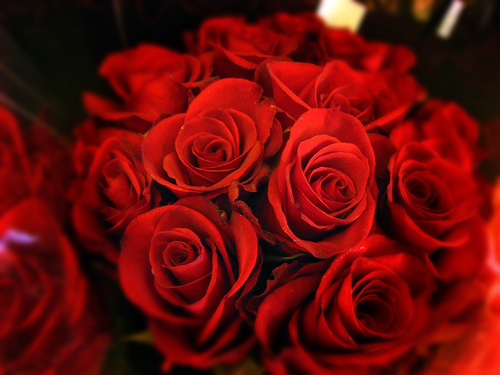

In [22]:
PIL.Image.open(str(roses[69]))

In [24]:
flower_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [25]:
flower_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

# Converting image into 3-D numpy array using opencv

In [26]:
img = cv.imread(str(flower_images_dict['roses'][69]))
img

array([[[  8,   7,  17],
        [  8,   7,  17],
        [  8,   7,  16],
        ...,
        [  5,  10,  13],
        [  4,   7,  11],
        [  5,   7,   8]],

       [[  8,   7,  17],
        [  8,   7,  17],
        [  8,   7,  16],
        ...,
        [  6,   9,  13],
        [  4,   7,  11],
        [  5,   7,   8]],

       [[  9,   8,  18],
        [  9,   8,  18],
        [  9,   8,  18],
        ...,
        [  5,   8,  12],
        [  3,   7,   8],
        [  4,   6,   7]],

       ...,

       [[  7,   8, 150],
        [  6,   7, 141],
        [  8,   6, 129],
        ...,
        [ 23,  47, 253],
        [ 24,  48, 254],
        [ 24,  49, 253]],

       [[  6,   7, 147],
        [  7,   6, 139],
        [  7,   6, 126],
        ...,
        [ 22,  46, 252],
        [ 23,  47, 253],
        [ 23,  47, 253]],

       [[  8,   6, 149],
        [  9,   6, 139],
        [  8,   6, 125],
        ...,
        [ 22,  45, 254],
        [ 23,  46, 255],
        [ 24,  46, 255]]

In [28]:
img.shape

(375, 500, 3)

In [29]:
x, y = [], []

for flower_name, images in flower_images_dict.items():
    for image in images:
        img = cv.imread(str(image))
        resized_img = cv.resize(img,(100,100))
        x.append(resized_img)
        y.append(flower_labels_dict[flower_name])

In [30]:
x = np.array(x)
y = np.array(y)

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [32]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [34]:
num_classes = 5 #Since we have 5 types of flowers
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)    
])

In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [37]:
model.fit(x_train_scaled, y_train, epochs=30)   

Epoch 1/30
86/86 [==============================] - 15s 150ms/step - loss: 1.3351 - accuracy: 0.4215
Epoch 2/30
86/86 [==============================] - 13s 153ms/step - loss: 1.0664 - accuracy: 0.5650
Epoch 3/30
86/86 [==============================] - 13s 152ms/step - loss: 0.9082 - accuracy: 0.6359
Epoch 4/30
86/86 [==============================] - 13s 155ms/step - loss: 0.8036 - accuracy: 0.6882
Epoch 5/30
86/86 [==============================] - 13s 157ms/step - loss: 0.6854 - accuracy: 0.7282
Epoch 6/30
86/86 [==============================] - 14s 162ms/step - loss: 0.5714 - accuracy: 0.7809
Epoch 7/30
86/86 [==============================] - 14s 161ms/step - loss: 0.4687 - accuracy: 0.8314
Epoch 8/30
86/86 [==============================] - 13s 150ms/step - loss: 0.3643 - accuracy: 0.8637
Epoch 9/30
86/86 [==============================] - 13s 153ms/step - loss: 0.2470 - accuracy: 0.9128
Epoch 10/30
86/86 [==============================] - 13s 150ms/step - loss: 0.1925 - accura

In [39]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 1s 22ms/step - loss: 2.3906 - accuracy: 0.6645


[2.3905744552612305, 0.6644880175590515]

# Only 66% accuracy, whereas train data showed 99%, shows overfitting

# Improve Test Accuracy Using Data Augmentation

In [50]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", seed=3),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

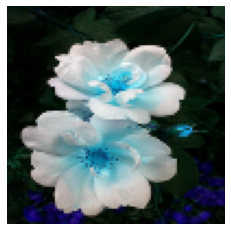

In [52]:
plt.axis('off')
plt.imshow(x[0])

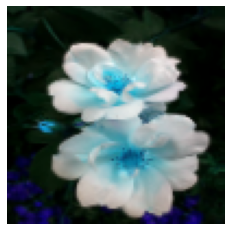

In [57]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

In [59]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 [==============================] - 15s 159ms/step - loss: 1.3323 - accuracy: 0.4059
Epoch 2/30
86/86 [==============================] - 14s 166ms/step - loss: 1.0625 - accuracy: 0.5810
Epoch 3/30
86/86 [==============================] - 14s 166ms/step - loss: 0.9723 - accuracy: 0.6283
Epoch 4/30
86/86 [==============================] - 14s 167ms/step - loss: 0.8846 - accuracy: 0.6570
Epoch 5/30
86/86 [==============================] - 14s 166ms/step - loss: 0.8436 - accuracy: 0.6762
Epoch 6/30
86/86 [==============================] - 14s 165ms/step - loss: 0.8069 - accuracy: 0.6948
Epoch 7/30
86/86 [==============================] - 14s 165ms/step - loss: 0.7781 - accuracy: 0.7024
Epoch 8/30
86/86 [==============================] - 14s 165ms/step - loss: 0.7386 - accuracy: 0.7122
Epoch 9/30
86/86 [==============================] - 14s 164ms/step - loss: 0.7040 - accuracy: 0.7344
Epoch 10/30
86/86 [==============================] - 14s 164ms/step - loss: 0.6898 - accura

In [61]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 1s 23ms/step - loss: 0.9553 - accuracy: 0.7255


[0.9553133845329285, 0.7254902124404907]

##  By using data augmentation and drop out layer the accuracy of test set predictions is increased to 72.54%